# Assignment 4

Welcome to Assignment 4. This will be the most fun. Now we will prepare data for plotting.

Just make sure you hit the play button on each cell from top to down. There are three functions you have to implement. Please also make sure than on each change on a function you hit the play button again on the corresponding cell to make it available to the rest of this notebook.



Sampling is one of the most important things when it comes to visualization because often the data set gets so huge that you simply

- can't copy all data to a local Spark driver (Watson Studio is using a "local" Spark driver)
- can't throw all data at the plotting library

Please implement a function which returns a 10% sample of a given data frame:

In [1]:
def getSample():
    #TODO Please enter your code here, you are not required to use the template code below
    #some reference: https://spark.apache.org/docs/latest/api/python/pyspark.sql.html#pyspark.sql.DataFrame
    #https://spark.apache.org/docs/latest/api/sql/
    return df.sample(False,0.1)

Waiting for a Spark session to start...
Spark Initialization Done! ApplicationId = app-20200308163645-0001
KERNEL_ID = d160c9bb-47f5-49e9-b98a-ccff9108c8dd


Now we want to create a histogram and boxplot. Please ignore the sampling for now and return a python list containing all temperature values from the data set

In [2]:
def getListForHistogramAndBoxPlot():
    #TODO Please enter your code here, you are not required to use the template code below
    #some reference: https://spark.apache.org/docs/latest/api/python/pyspark.sql.html#pyspark.sql.DataFrame
    #https://spark.apache.org/docs/latest/api/sql/
    my_list = spark.sql("""
        SELECT temperature from washing where temperature is not null
    """).rdd.map(lambda row: row.temperature).take(10)
    if not type(my_list)==list:
        raise Exception('return type not a list')
    return my_list

Finally we want to create a run chart. Please return two lists (encapsulated in a python tuple object) containing temperature and timestamp (ts) ordered by timestamp. Please refer to the following link to learn more about tuples in python: https://www.tutorialspoint.com/python/python_tuples.htm

In [7]:
#should return a tuple containing the two lists for timestamp and temperature
#please make sure you take only 10% of the data by sampling
#please also ensure that you sample in a way that the timestamp samples and temperature samples correspond (=> call sample on an object still containing both dimensions)
def getListsForRunChart():
    #TODO Please enter your code here, you are not required to use the template code below
    #some reference: https://spark.apache.org/docs/latest/api/python/pyspark.sql.html#pyspark.sql.DataFrame
    #https://spark.apache.org/docs/latest/api/sql/
    double_tuple_rdd = spark.sql("""
        select temperature,ts from washing where temperature is not null order by ts asc
    """).sample(False,0.1).rdd.map(lambda row : (row.ts,row.temperature))
    result_array_ts = double_tuple_rdd.map(lambda ts_temperature: ts_temperature[0]).collect()
    result_array_temperature = double_tuple_rdd.map(lambda ts_temperature: ts_temperature[1]).collect()
    return (result_array_ts,result_array_temperature)

Now it is time to grab a PARQUET file and create a dataframe out of it. Using SparkSQL you can handle it like a database. 

In [8]:
!wget https://github.com/IBM/coursera/blob/master/coursera_ds/washing.parquet?raw=true
!mv washing.parquet?raw=true washing.parquet

--2020-03-08 16:37:54--  https://github.com/IBM/coursera/blob/master/coursera_ds/washing.parquet?raw=true
Resolving github.com (github.com)... 140.82.118.3
Connecting to github.com (github.com)|140.82.118.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/IBM/coursera/raw/master/coursera_ds/washing.parquet [following]
--2020-03-08 16:37:55--  https://github.com/IBM/coursera/raw/master/coursera_ds/washing.parquet
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/IBM/coursera/master/coursera_ds/washing.parquet [following]
--2020-03-08 16:37:55--  https://raw.githubusercontent.com/IBM/coursera/master/coursera_ds/washing.parquet
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.60.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.60.133|:443... connected.
HTTP request sent, awaiting response... 200

In [9]:
df = spark.read.parquet('washing.parquet')
df.createOrReplaceTempView('washing')
df.show()

+--------------------+--------------------+-----+--------+----------+---------+--------+-----+-----------+-------------+-------+
|                 _id|                _rev|count|flowrate|fluidlevel|frequency|hardness|speed|temperature|           ts|voltage|
+--------------------+--------------------+-----+--------+----------+---------+--------+-----+-----------+-------------+-------+
|0d86485d0f88d1f9d...|1-57940679fb8a713...|    4|      11|acceptable|     null|      77| null|        100|1547808723923|   null|
|0d86485d0f88d1f9d...|1-15ff3a0b304d789...|    2|    null|      null|     null|    null| 1046|       null|1547808729917|   null|
|0d86485d0f88d1f9d...|1-97c2742b68c7b07...|    4|    null|      null|       71|    null| null|       null|1547808731918|    236|
|0d86485d0f88d1f9d...|1-eefb903dbe45746...|   19|      11|acceptable|     null|      75| null|         86|1547808738999|   null|
|0d86485d0f88d1f9d...|1-5f68b4c72813c25...|    7|    null|      null|       75|    null| null|   

Now we gonna test the functions you've completed and visualize the data.

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

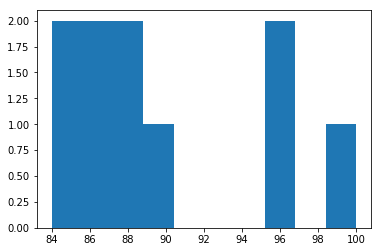

In [11]:
plt.hist(getListForHistogramAndBoxPlot())
plt.show()

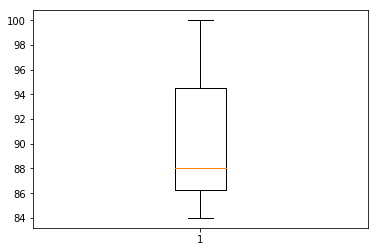

In [12]:
plt.boxplot(getListForHistogramAndBoxPlot())
plt.show()

In [13]:
lists = getListsForRunChart()

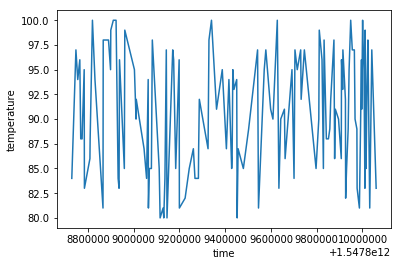

In [14]:
plt.plot(lists[0],lists[1])
plt.xlabel("time")
plt.ylabel("temperature")
plt.show()

Congratulations, you are done! The following code submits your solution to the grader. Again, please update your token from the grader's submission page on Coursera

In [15]:
!rm -f rklib.py
!wget https://raw.githubusercontent.com/IBM/coursera/master/rklib.py

--2020-03-08 16:39:13--  https://raw.githubusercontent.com/IBM/coursera/master/rklib.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 199.232.56.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|199.232.56.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2540 (2.5K) [text/plain]
Saving to: 'rklib.py'

100%[======================================>] 2,540       --.-K/s   in 0s      

2020-03-08 16:39:13 (41.9 MB/s) - 'rklib.py' saved [2540/2540]



In [16]:
from rklib import submitAll
import json

key = "S5PNoSHNEeisnA6YLL5C0g"
email = 'jkarock3@gmail.com'
token = '3ThW1qkEEeVtwjDr'

In [19]:
parts_data = {}
parts_data["iLdHs"] = json.dumps(str(type(getListForHistogramAndBoxPlot())))
parts_data["xucEM"] = json.dumps(len(getListForHistogramAndBoxPlot()))
parts_data["IyH7U"] = json.dumps(str(type(getListsForRunChart())))
parts_data["MsMHO"] = json.dumps(len(getListsForRunChart()[0]))

submitAll(email, token, key, parts_data)

Submission successful, please check on the coursera grader page for the status
-------------------------
{"elements":[{"itemId":"95cS6","id":"sUpST4RAEeawAApvKZgcCQ~95cS6~uPWOPWFbEeqa8xLrHdWe6Q","courseId":"sUpST4RAEeawAApvKZgcCQ"}],"paging":{},"linked":{}}
-------------------------
